In [1]:
!pip install antigranular

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.0/176.0 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.2/6.2 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 61.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 53.8 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import numpy as np


In [4]:
import antigranular as ag
session = ag.login("tM3bEZVPTilWwiqTJFkvtNmA4cqFUOBb", "19d4LdAnAZx9uAmceTX2AUOwVdFxkrG/zRWiKGtsPfd8DEWAI7VGGw4gQsFY96Lh", dataset = "Car Evaluation")

Loading dataset "Car Evaluation" to the kernel...
Dataset "Car Evaluation" loaded to the kernel as car_evaluation
Connected to Antigranular server session id: 9e29a726-f539-4ba0-9327-f0b8050bd451, the session will time out if idle for 60 minutes
Cell magic '%%ag' registered successfully, use `%%ag` in a notebook cell to execute your python code on Antigranular private python server
🚀 Everything's set up and ready to roll!


In [5]:
%%ag
import pandas as pd

In [6]:
%%ag
train_x = car_evaluation["train_x"]
train_y = car_evaluation["train_y"]
test_x = car_evaluation["test_x"]

ag_print(train_x.columns)
ag_print(train_y.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')
Index(['class'], dtype='object')



In [7]:
session.privacy_odometer()

{'total_epsilon_used': 0.0,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

## Data Preprocessing

In [8]:
%%ag
unique_categories = {}
for column in test_x.columns:
    unique_categories.update({column: test_x[column].unique().tolist()})
ag_print(unique_categories)


{'buying': ['high', 'med', 'low', 'vhigh'], 'maint': ['high', 'low', 'vhigh', 'med'], 'doors': ['4', '2', '5more', '3'], 'persons': ['2', '4', 'more'], 'lug_boot': ['med', 'big', 'small'], 'safety': ['high', 'med', 'low']}



In [9]:
%%ag
encoding_scheme_train_x_gen = {}

for column, values in unique_categories.items():
    encoding_scheme_train_x_gen[column] = {value: idx for idx, value in zip(range(len(values)), values)}

ag_print(encoding_scheme_train_x_gen)

{'buying': {'high': 0, 'med': 1, 'low': 2, 'vhigh': 3}, 'maint': {'high': 0, 'low': 1, 'vhigh': 2, 'med': 3}, 'doors': {'4': 0, '2': 1, '5more': 2, '3': 3}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 0, 'big': 1, 'small': 2}, 'safety': {'high': 0, 'med': 1, 'low': 2}}



In [10]:
%%ag
encoding_scheme_train_x = {'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}


In [11]:
%%ag
ag_print(encoding_scheme_train_x)

{'buying': {'high': 2, 'med': 1, 'low': 0, 'vhigh': 3}, 'maint': {'high': 2, 'low': 0, 'vhigh': 3, 'med': 1}, 'doors': {'4': 2, '2': 0, '5more': 2, '3': 1}, 'persons': {'2': 0, '4': 1, 'more': 2}, 'lug_boot': {'med': 1, 'big': 2, 'small': 0}, 'safety': {'high': 2, 'med': 1, 'low': 0}}



Apply Encoding for train_x

In [12]:
%%ag
for col, value in encoding_scheme_train_x.items():
    train_x[col] = train_x[col].map(value, eps=1)

In [13]:
%%ag
ag_print(train_x.describe(eps=1))

            buying        maint        doors      persons     lug_boot  \
count  1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean      1.366382     1.485452     1.665530     0.837791     1.023093   
std       1.008443     1.172972     0.855880     0.288037     1.301756   
min       0.470603     0.053699     0.693234     0.874821     0.675890   
25%       0.584586     0.950585     0.793073     0.257125     0.367878   
50%       1.863104     1.373869     1.553277     0.630065     1.319157   
75%       2.933000     2.407733     3.988414     1.248970     1.609969   
max       3.263079     3.901059     2.847286     2.781931     2.675592   

            safety  
count  1382.000000  
mean      1.069170  
std       1.691422  
min       0.148687  
25%       0.713775  
50%       1.608843  
75%       1.767241  
max       2.524687  



Apply encoding train_y

In [14]:
%%ag
train_y_schema = {
    'unacc': 0,
    'acc': 1,
    'good': 2,
    'vgood': 3
}

train_y[train_y.columns[0]] = train_y[train_y.columns[0]].map(train_y_schema, eps=1)

In [15]:
%%ag
ag_print(train_y.describe(eps=.1))

             class
count  1382.000000
mean      0.000000
std       1.145669
min       3.454373
25%       1.975789
50%       0.054343
75%       0.292086
max       1.662485



## Corelation matrix

In [16]:
%%ag
priv_corr = train_x.corr(eps=10)
export(priv_corr , 'priv_corr')

Setting up exported variable in local environment: priv_corr


In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
priv_corr

,buying,maint,doors,persons,lug_boot,safety
buying,1.0,0.018299,0.019169,0.022244,0.060106,0.057864
maint,0.018299,1.0,-0.077371,-0.094215,-0.105571,0.152625
doors,0.019169,-0.077371,1.0,-0.057591,-0.008076,-0.022265
persons,0.022244,-0.094215,-0.057591,1.0,0.017801,0.16034
lug_boot,0.060106,-0.105571,-0.008076,0.017801,1.0,-0.05582
safety,0.057864,0.152625,-0.022265,0.16034,-0.05582,1.0


<Axes: >

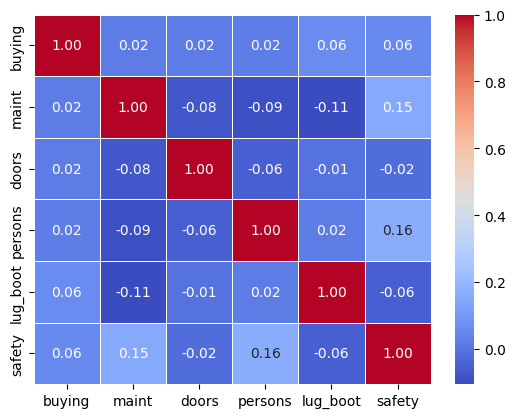

In [19]:
sns.heatmap(priv_corr.apply(pd.to_numeric, errors='coerce').astype(float), annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f")

Correlation coefficients measure the linear relationship between two variables, ranging from -1 (perfect negative linear relationship) to +1 (perfect positive linear relationship), with 0 indicating no linear relationship.
### Insights from the Heatmap:

1. **Weak Correlations**:
   - No pair of variables exhibits a particularly strong correlation (near -1 or 1). Most of the correlations are close to zero, suggesting a lack of a strong linear relationship between most pairs of variables.
   
2. **Positive Correlations**:
   - The most notable positive correlation is between "safety" and "maint" (0.15), though it is still quite weak.

Join two dataset train_x and train_y

In [20]:
%%ag
train_data = train_x.join(train_y, how="inner")

In [21]:
%%ag
hist_buying = train_data.hist2d(eps=1, x='buying', y='class')

In [22]:
%%ag
export(hist_buying, 'hist_buying')

Setting up exported variable in local environment: hist_buying


In [23]:
hist_buying

(array([[214.,   0.,  69.,   0.,   0.,  39.,   0.,  32.,   0.,   5.],
        [  0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,   0.,   0.],
        [226.,   0.,  88.,   0.,   0.,  23.,   3.,  20.,   0.,   0.],
        [  0.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   0.,   3.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.],
        [251.,   0.,  88.,   0.,   1.,   1.,   4.,   4.,   0.,   2.],
        [  1.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [281.,   0.,  57.,   1.,   0.,   0.,   2.,   1.,   3.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.,   0.,   1.],
        [  0.,   1.,   2.,   0.,   0.,   0.,   0.,   0.,   3.,   0.]]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]))

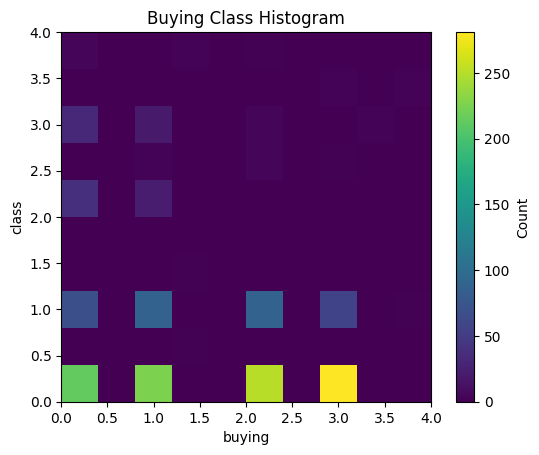

In [24]:
hist, x_edges, y_edges = hist_buying

# Plot the histogram
plt.imshow(hist.T, extent=(x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]), origin='lower', cmap='viridis')
plt.colorbar(label='Count')
plt.xlabel('buying')
plt.ylabel('class')
plt.title('Buying Class Histogram')
plt.show()

This shows class 0 that is "unacc" is buying highest compared with other class

In [25]:
%%ag
ag_print(train_x.columns)

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')



In [26]:
%%ag
ag_print(train_data.where(train_data['class'] == 0).mean(eps=10))

buying      1.611552
maint       1.644805
doors       1.204504
persons     0.806753
lug_boot    0.929333
safety      0.741820
class       0.000044
dtype: float64



In [27]:
%%ag
mean_class_0 = train_data.where(train_data['class'] == 0).mean(eps=10)
ag_print(mean_class_0)
export(mean_class_0, 'mean_class_0')

Setting up exported variable in local environment: mean_class_0
buying      1.612167
maint       1.644922
doors       1.204050
persons     0.808450
lug_boot    0.929739
safety      0.741008
class       0.000211
dtype: float64



In [28]:
%%ag
mean_class_1 = train_data.where(train_data['class'] == 1).mean(eps=10)
mean_class_2 = train_data.where(train_data['class'] == 2).mean(eps=10)
mean_class_3 = train_data.where(train_data['class'] == 3).mean(eps=10)
export (mean_class_1, 'mean_class_1')
export (mean_class_2, 'mean_class_2')
export (mean_class_3, 'mean_class_3')


Setting up exported variable in local environment: mean_class_1
Setting up exported variable in local environment: mean_class_2
Setting up exported variable in local environment: mean_class_3


In [29]:
# to pandas dataframe
df = pd.DataFrame([mean_class_0, mean_class_1, mean_class_2, mean_class_3])

In [30]:
df.drop(columns=['class'], inplace=True)

<Axes: >

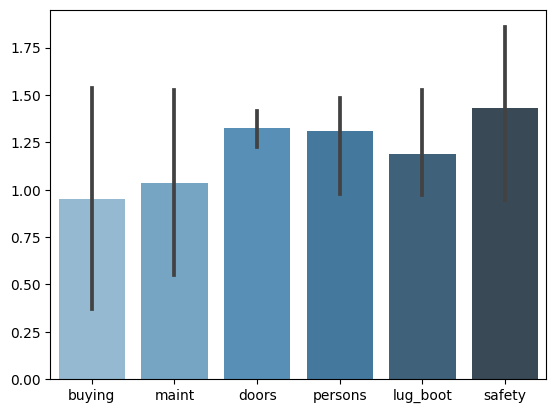

In [31]:
# sns barplot
sns.barplot(data=df, palette="Blues_d")

Observations:

- **buying**: There are noticeable differences in the mean buying price among different classes.
- **maint**: Similar to buying, maintenance cost also shows some variation.
- **safety**: Safety shows clear variations, and looks like most important.
  
The remaining features (**doors**, **persons**, **lug_boot**) exhibit less variation among classes.

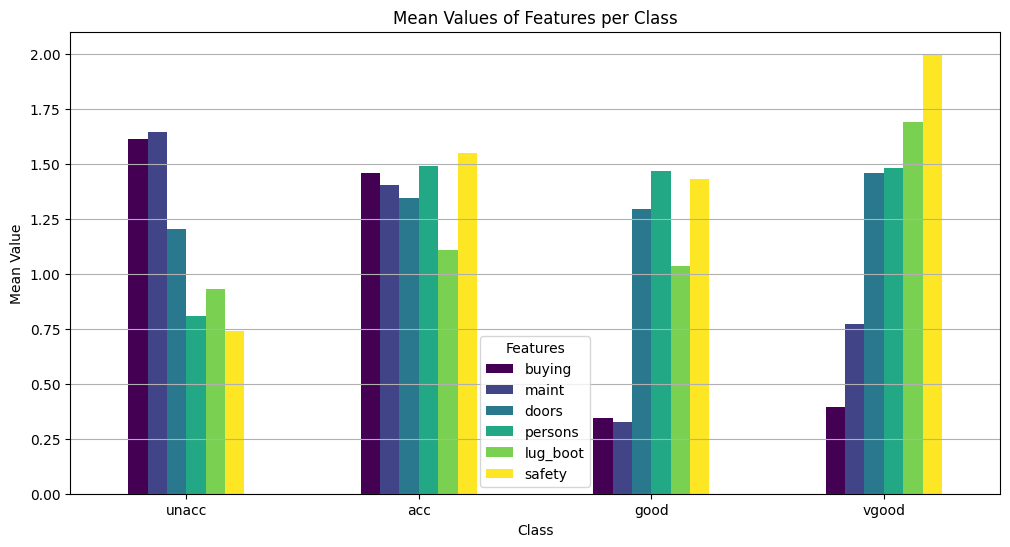

In [32]:
ax = df.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Mean Values of Features per Class')
plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.xticks(ticks=[0, 1, 2, 3], labels=['unacc', 'acc', 'good', 'vgood'], rotation=0)
plt.legend(title='Features')
plt.grid(axis='y')

## Observations:
1. **Safety Considerations:**
   - 'vgood' cars tend to have the highest mean safety rating, suggesting that safety is a crucial factor in determining the highest class of cars.
   - 'unacc' (unacceptable) cars have the lowest mean safety rating, highlighting that lower safety ratings are a significant factor for classifying cars into this undesirable category.

2. **Economic Aspects (Buying & Maintenance):**
   - 'unacc' cars tend to have higher mean buying and maintenance costs, indicating that more expensive and high-maintenance cars are often deemed less acceptable.
   - 'good' cars have the lowest mean buying and maintenance costs, hinting that more economically friendly cars are often classified in this category.

3. **Luggage Boot Size:**
   - 'vgood' cars have the highest mean luggage boot size, showing a potential preference for larger boot sizes in this class.
   - The other classes do not show significant variations in the luggage boot size.

4. **Capacity (Persons & Doors):**
   - 'unacc' cars have a lower mean value for persons, suggesting that cars with lower seating capacity tend to be categorized as unacceptable.
   - There isn't a clear pattern for the number of doors across classes, implying that this feature might not be as impactful in classifying cars.

### Summary:

- Safety is a pivotal factor across all classes, with higher safety ratings generally correlating with more favorable classes.
- Economic aspects (buying and maintenance costs) appear to significantly impact the classification, especially distinguishing 'unacc' and 'good' cars.
- Features like the number of doors might not be significant in determining car classes due to the lack of clear variation across different classes.

This analysis could inform the feature selection or weighting in a predictive model, focusing on safety and economic aspects as potentially influential variables.

In [33]:
%%ag
# simple rule based model
def simple_rule_based_model(data):
    predictions = []
    for _, row in data.iterrows():
        # Rule 1: High safety is generally 'vgood'
        if row['safety'] >= 2:
            predictions.append('vgood')
        # Rule 2: Low buying and maintenance costs tend to be 'good'
        elif row['buying'] == 0 and row['maint'] == 1:
            predictions.append('good')
        # Rule 3: Low safety tends to be 'unacc'
        elif row['safety'] == 0:  # 0: low
            predictions.append('unacc')
        # Else classify as 'acc'
        else:
            predictions.append('acc')
    return predictions

In [34]:
%%ag
# encode test_x
for col, value in encoding_scheme_train_x.items():
    test_x[col] = test_x[col].map(value)

In [35]:
%%ag
test_predictions = simple_rule_based_model(test_x)

In [36]:
%%ag
ag_print(test_predictions)

['vgood', 'acc', 'acc', 'acc', 'unacc', 'acc', 'vgood', 'acc', 'acc', 'vgood', 'vgood', 'vgood', 'vgood', 'vgood', 'vgood', 'acc', 'acc', 'vgood', 'vgood', 'acc', 'vgood', 'vgood', 'vgood', 'acc', 'vgood', 'acc', 'vgood', 'unacc', 'vgood', 'vgood', 'acc', 'acc', 'vgood', 'acc', 'acc', 'acc', 'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'vgood', 'vgood', 'vgood', 'unacc', 'acc', 'vgood', 'vgood', 'vgood', 'acc', 'acc', 'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'acc', 'unacc', 'acc', 'vgood', 'unacc', 'vgood', 'acc', 'unacc', 'vgood', 'unacc', 'unacc', 'unacc', 'vgood', 'vgood', 'unacc', 'unacc', 'unacc', 'acc', 'vgood', 'unacc', 'unacc', 'acc', 'vgood', 'acc', 'unacc', 'vgood', 'vgood', 'vgood', 'unacc', 'vgood', 'unacc', 'unacc', 'acc', 'acc', 'vgood', 'unacc', 'unacc', 'acc', 'acc', 'vgood', 'good', 'unacc', 'acc', 'vgood', 'acc', 'acc', 'vgood', 'acc', 'vgood', 'unacc', 'vgood', 'vgood', 'acc', 'vgood', 'vgood', 'unacc', 'vgood', 'unacc', '

In [37]:
%%ag
preds = pd.DataFrame(test_predictions, columns=['class'])

In [38]:
%%ag
submit_predictions(preds)

score: {'leaderboard': 0.2833269234869923, 'logs': {'BIN_ACC': 0.2833269234869923}}



In [39]:
session.privacy_odometer()

{'total_epsilon_used': 69.1,
 'total_delta_used': 0.0,
 'library_costs': None,
 'dataset_costs': None}

In [40]:
%%ag
# simple rule based
def rule_based_model(data):
    predictions = []
    for _, row in data.iterrows():
        if row['safety'] == 0:
            predictions.append('unacc')
        elif row['buying'] == 0 and row['maint'] == 0:
            predictions.append('acc')
        else:
            predictions.append('unacc')
    return predictions


In [41]:
%%ag
predictions = rule_based_model(test_x)

In [42]:
%%ag
submit_predictions(pd.DataFrame(predictions))

score: {'leaderboard': 0.6175957702893319, 'logs': {'BIN_ACC': 0.6175957702893319}}



In [43]:
session.terminate_session()

{'status': 'ok'}